In [15]:
import pandas as pd
import numpy as np
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

# Import the data 

In [16]:
file_name = 'data/climate_videos.jsonl'
df = pd.read_json(file_name, lines=True)
df.set_index('display_id', inplace=True)
df = df.iloc[:1000]
df.head()

,categories,channel_id,crawl_date,description,dislike_count,duration,like_count,tags,title,upload_date,view_count
display_id,,,,,,,,,,,
XPSYzLZ7xKU,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:31.549534,Climate change threatens to make dry regions e...,503.0,200,15328.0,"seeker,science,curiosity,education,explain,lea...",Transforming Air Into Pure Drinking Water Is F...,2019-10-03 00:00:00,357909.0
8riq9piAdiE,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:39.784993,Carbon pollution is being sucked from the sky ...,288.0,291,7980.0,"seeker,science,curiosity,education,explain,lea...",Could Injecting Carbon Into the Earth Save Our...,2019-09-19 00:00:00,176894.0
yeVLjOTThEM,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:47.579992,"Contrary to popular belief, the Amazon forest ...",623.0,272,12140.0,"seeker,science,curiosity,education,explain,lea...",The Amazon Rainforest Doesn’t Produce 20% of O...,2019-09-04 00:00:00,269588.0
-fNCUzVRcL4,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:58.628372,An international team of scientists has embark...,90.0,386,4007.0,"focal point,documentary,interview,short doc,sc...","Glaciers Are Collapsing, Here's Why We Need a ...",2019-08-11 00:00:00,113987.0
-3YhFNs1XNY,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:05.226949,NASA and the ISRO are planning on venturing to...,242.0,264,8245.0,"seeker,science,curiosity,education,explain,lea...",Why Scientists Are Exploring Earth’s Dangerous...,2019-07-05 00:00:00,264279.0


# Create the bipartite graph between videos and tags

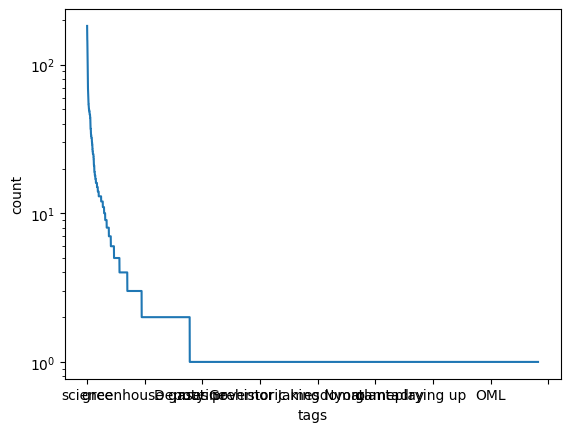

science            182
discovery news     149
Jordan Peterson    147
Psychology         146
Educational        145
                  ... 
Greenpeace           1
The Wave             1
CAFOD                1
Help                 1
Sinha                1
Length: 7824, dtype: int64

In [17]:
data = df['tags']
tags_count = pd.Series(dict(Counter(tag for tags in data for tag in tags.split(','))))
tags_count.sort_values(inplace=True, ascending=False)
tags_count.plot(logy=True, xlabel='tags', ylabel='count')
plt.show()
tags_count

# Only keep the top 90th percentile of tags 

In [18]:
counts_90th = tags_count.quantile(0.9)
tags_count = tags_count[tags_count > counts_90th]
print(tags_count)

science                    182
discovery news             149
Jordan Peterson            147
Psychology                 146
Educational                145
                          ... 
innovations                  4
astronomy                    4
heat                         4
science in the extremes      4
flat earth                   4
Length: 697, dtype: int64
